<a href="https://colab.research.google.com/github/EnigmaCipher/sms_spam_classifier/blob/main/SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE- III





# **SMS SPAM CLASSIFICATION**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
import pandas as pd

In [ ]:
#Reading the file
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [ ]:
#Displays the first five rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Renaming the columns
data.rename(columns={'v1': 'Type','v2': 'Message'},inplace=True)

In [ ]:
#Dropping the unwanted columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
data.sample(10)

,Type,Message
4174,ham,How are you doing. How's the queen. Are you go...
5048,ham,"Edison has rightly said, \A fool can ask more ..."
5387,ham,I will be gentle baby! Soon you will be taking...
3028,ham,What is your record for one night? :)
5451,ham,Just sing HU. I think its also important to fi...
4182,ham,"Sorry, I'll call later in meeting"
1311,ham,U r too much close to my heart. If u go away i...
5570,ham,The guy did some bitching but I acted like i'd...
2533,ham,Glad it went well :) come over at 11 then we'l...
4533,ham,I have no money 4 steve mate! !


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
#Replacing spam and ham with 1 and 0 respectively
data['Type'] = encoder.fit_transform(data['Type'])

In [ ]:
data.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking for missing values
data.isnull().sum()

Type       0
Message    0
dtype: int64

In [ ]:
#check for duplicate values
data.duplicated().sum()

403

In [ ]:
#removing duplicates
data = data.drop_duplicates(keep='first')

In [ ]:
#Checking if the duplicates are removed or not
data.duplicated().sum()

0

In [ ]:
#Displays the number of ham and spam
data.shape

(5169, 2)

In [ ]:
data.head()

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Exploratory Data Analysis

In [ ]:
Count=data['Type'].value_counts()

In [ ]:
print(Count)

0    4516
1     653
Name: Type, dtype: int64


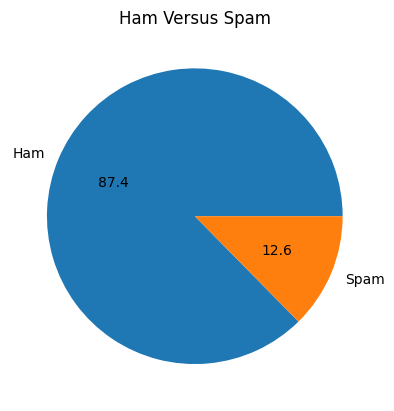

In [ ]:
from matplotlib import pyplot as plt
plt.pie(Count,labels=['Ham','Spam'],autopct="%0.1f")
plt.title('Ham Versus Spam')
plt.show()

In [ ]:
#Importing library for Natural Language Processing
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Counting the number of characters
data['Character_count']=data['Message'].apply(len)

In [ ]:
data.head()

,Type,Message,Character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data['Character_count'].max()

910

In [ ]:
data['Character_count'].min()

2

In [ ]:
#Counting the number of words of sample message
data['Word_count']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
data.head()

,Type,Message,Character_count,Word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#Counting the number of sentences in sample messages
data['Sentence_count']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,Type,Message,Character_count,Word_count,Sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
import seaborn as sns

<Axes: xlabel='Character_count', ylabel='Count'>

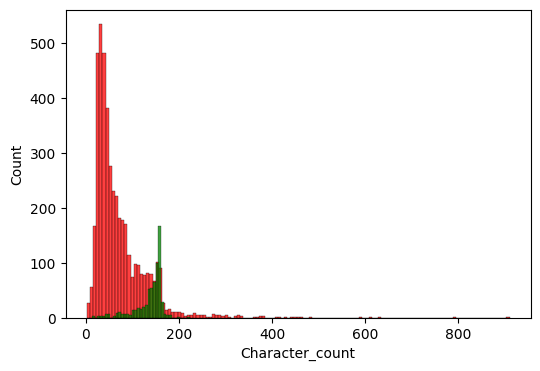

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Type']==0]['Character_count'],color='r')
sns.histplot(data[data['Type']==1]['Character_count'],color='g')

<Axes: xlabel='Word_count', ylabel='Count'>

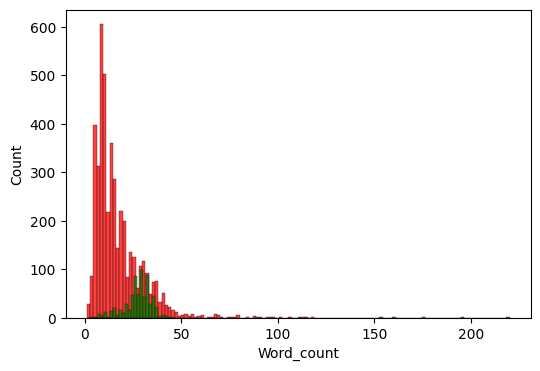

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Type']==0]['Word_count'],color='r')
sns.histplot(data[data['Type']==1]['Word_count'],color='g')

In [ ]:
#Plotting

**Data Pre-processing**

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#trying to check the stop words
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Function to remove stop words, punctuation marks and to return the lemmatized statement
def new_message(message):
    message=message.lower()
    message=nltk.word_tokenize(message)

    txt=[]
    for char in message:
        if char.isalnum() and char not in stopwords.words('english') and char not in string.punctuation:
            txt.append(char)

    text=[]
    for word in txt:
        text.append(lemmatizer.lemmatize(word))

    return " ".join(text)




In [ ]:
new_message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight,k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [ ]:
lemmatizer.lemmatize('cried')

'cried'

In [ ]:
data['Message'][5571]

'Rofl. Its true to its name'

In [ ]:
for i in range(1,11):
    print(i, new_message(data['Message'][i]))

1 ok lar joking wif u oni
2 free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18
3 u dun say early hor u c already say
4 nah think go usf life around though
5 freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv
6 even brother like speak treat like aid patent
7 per request melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune
8 winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hour
9 mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030
10 gon na home soon want talk stuff anymore tonight k cried enough today


In [ ]:
#creating a new data frame which contains unconventional text after all steps taken
data['new message']=data['Message'].apply(new_message)

In [ ]:
data.head()

,Type,Message,Character_count,Word_count,Sentence_count,new message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [ ]:
data.shape

(5169, 6)

In [ ]:
data.isnull().sum()

Type               0
Message            0
Character_count    0
Word_count         0
Sentence_count     0
new message        0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

,Type,Message,Character_count,Word_count,Sentence_count,new message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [ ]:
data[['Message','Character_count','Word_count','Sentence_count','new message']].describe()

,Character_count,Word_count,Sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
data[data['Type']==0][['Character_count','Word_count','Sentence_count']].describe()

,Character_count,Word_count,Sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
data[data['Type']==1][['Character_count','Word_count','Sentence_count']].describe()

,Character_count,Word_count,Sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Importing the library WordCloud to get the frequency of words
from wordcloud import WordCloud
wc = WordCloud(width=600,min_font_size=8,background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['Type']==1]['new message'].str.cat(sep=" "))

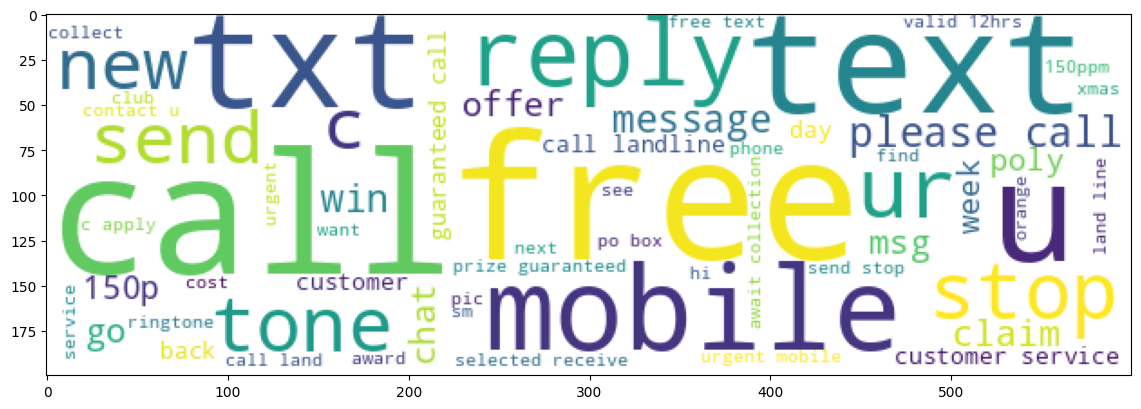

In [ ]:
plt.figure(figsize=(14,20))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['Type']==0]['new message'].str.cat(sep=" "))

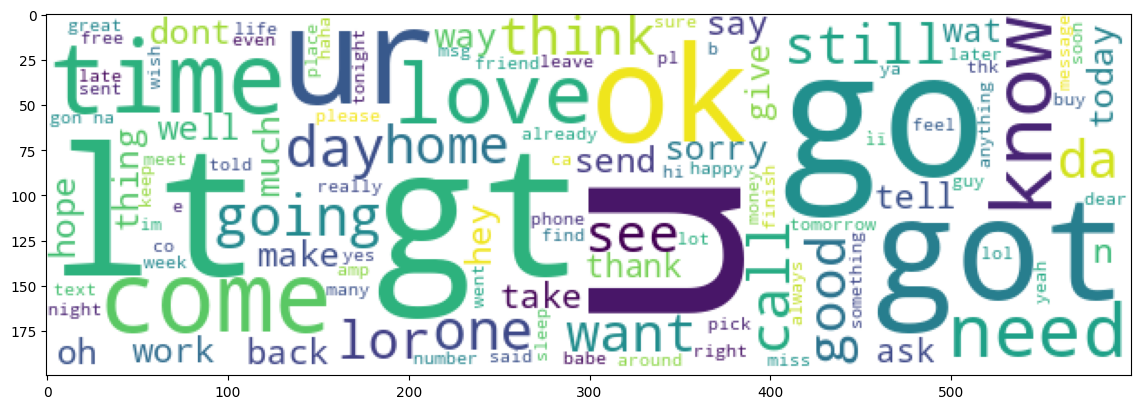

In [ ]:
plt.figure(figsize=(14,20))
plt.imshow(ham_wc)

In [ ]:
spammed_box = []
for msg in data[data['Type'] == 1]['new message'].tolist():
    for word in msg.split():
        spammed_box.append(word)


In [ ]:
hammed_box = []
for msg in data[data['Type'] == 0]['new message'].tolist():
    for word in msg.split():
        hammed_box.append(word)


In [ ]:
#finding number of words under spam messages
len(spammed_box)

9939

In [ ]:
#finding number of words under ham messages
len(hammed_box)

35404

In [ ]:
# from collections import Counter
# plt.figure(figsize=(14,6))
# sns.barplot(pd.DataFrame(Counter(hammed_box).most_common(50))[0],pd.DataFrame(Counter(hammed_box).most_common(50))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
pd.DataFrame(Counter(hammed_box).most_common(30))

,0,1
0,u,935
1,get,304
2,gt,288
3,lt,287
4,2,284
5,go,267
6,got,236
7,know,233
8,come,226
9,like,224


In [ ]:
# plt.figure(figsize=(14,6))
# sns.barplot(pd.DataFrame(Counter(spammed_box).most_common(50))[0],pd.DataFrame(Counter(spammed_box).most_common(50))[1])
# plt.xticks(rotation='vertical')
# plt.show()

**MODEL BUILDING**

In [ ]:
#Transforming text into vectors and projecting it in the data space using countVectorizer and Term Frequency-Inverse document Frequency
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['new message']).toarray()

In [ ]:
Z = cv.fit_transform(data['new message']).toarray()

In [ ]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=data['Type'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Splitting data set into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
Z_train,Z_test,y1_train,y1_test = train_test_split(Z,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from xgboost import XGBClassifier

In [ ]:
#Using various classification models
mnb = MultinomialNB()
bnb = BernoulliNB()
svm = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
#Returning accuracy, precision and confusion matrix for various classifier models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confused_matrix = confusion_matrix(y_test,y_pred)
    return accuracy,precision,confused_matrix


In [ ]:
a=[mnb,bnb,svm,knc,rfc,etc,xgb]

In [ ]:
accuracy_scores_1 = []
precision_scores_1 = []
accuracy_scores_2 = []
precision_scores_2 = []

for clf in a:
    print()
    print("Applying tfidf: ")
    current_accuracy,current_precision,con_mat = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",f'{clf}')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion matrix - \n",con_mat)
    accuracy_scores_1.append(current_accuracy)
    precision_scores_1.append(current_precision)

    print()
    print("Applying cv: ")
    current_accuracy1,current_precision1,con_mat1 = train_classifier(clf, Z_train,y1_train,Z_test,y1_test)
    print("For ",f'{clf}')
    print("Accuracy - ",current_accuracy1)
    print("Precision - ",current_precision1)
    print("Confusion matrix - \n",con_mat1)
    accuracy_scores_2.append(current_accuracy1)
    precision_scores_2.append(current_precision1)



Applying tfidf: 
For  MultinomialNB()
Accuracy -  0.9748549323017408
Precision -  1.0
Confusion matrix - 
 [[896   0]
 [ 26 112]]

Applying cv: 
For  MultinomialNB()
Accuracy -  0.9632495164410058
Precision -  0.8289473684210527
Confusion matrix - 
 [[870  26]
 [ 12 126]]

Applying tfidf: 
For  BernoulliNB()
Accuracy -  0.9845261121856866
Precision -  1.0
Confusion matrix - 
 [[896   0]
 [ 16 122]]

Applying cv: 
For  BernoulliNB()
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
Confusion matrix - 
 [[893   3]
 [ 29 109]]

Applying tfidf: 
For  SVC(gamma=1.0, kernel='sigmoid')
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
Confusion matrix - 
 [[893   3]
 [ 20 118]]

Applying cv: 
For  SVC(gamma=1.0, kernel='sigmoid')
Accuracy -  0.9235976789168279
Precision -  0.7122302158273381
Confusion matrix - 
 [[856  40]
 [ 39  99]]

Applying tfidf: 
For  KNeighborsClassifier()
Accuracy -  0.9061895551257253
Precision -  1.0
Confusion matrix - 
 [[896   0]
 [ 97  

In [ ]:
#Analyzing the all the models and choosing the best one
performance_df = pd.DataFrame({'Algorithm':[i for i in a],'Accuracy_tfidf':accuracy_scores_1,'Precision_tfidf':precision_scores_1,'Accuracy_cv':accuracy_scores_2,'Precision_cv':precision_scores_2}).sort_values('Precision_tfidf',ascending=False)
performance_df

,Algorithm,Accuracy_tfidf,Precision_tfidf,Accuracy_cv,Precision_cv
0,MultinomialNB(),0.974855,1.000000,0.963250,0.828947
1,BernoulliNB(),0.984526,1.000000,0.969052,0.973214
3,KNeighborsClassifier(),0.906190,1.000000,0.902321,1.000000
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.974855,0.982759,0.969052,0.981818
2,"SVC(gamma=1.0, kernel='sigmoid')",0.977756,0.975207,0.923598,0.712230
5,"(ExtraTreeClassifier(random_state=1872583848),...",0.976789,0.975000,0.977756,0.991453
6,"XGBClassifier(base_score=None, booster=None, c...",0.966151,0.925620,0.973888,0.982609


In [ ]:
#Converting the best model and vectorizer into files
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))